# PHYS 6260: Homework 2, Yuchen Sun

## 1. Adaptive integration

In [22]:
import numpy as np
def f(x):
    return np.square(np.sin(np.sqrt(100*x)))

a, b = 0.0, 1.0
eps = 1e-6

x = np.array([a, b])
I1 = np.sum(f(x)) * 0.5

N = 2
h = (b-a)/N
x = np.array([(a+b) * 0.5])
I2 = 0.5 * I1 + np.sum(f(x)) * h

error1 = abs((I2-I1))/3*4
error2 = abs((I2-I1))/3
print("The number of slices is {}, its estimate of the integral is {:.7f}, its estimate of the error on the integral is {:.7f}".format(1, I1, error1))
print("The number of slices is {}, its estimate of the integral is {:.7f}, its estimate of the error on the integral is {:.7f}".format(2, I2, error2))

while error2 > eps:
    N *= 2
    h = (b-a)/N
    x = np.linspace(start=a+h,stop=b-h,num=N//2)
    I1 = I2
    I2 = 0.5 * I1 + np.sum(f(x))*h
    error2 = abs((I2-I1))/3
    print("The number of slices is {}, its estimate of the integral is {:.7f}, its estimate of the error on the integral is {:.7f}".format(N, I2, error2))

The number of slices is 1, its estimate of the integral is 0.1479795, its estimate of the error on the integral is 0.2363366
The number of slices is 2, its estimate of the integral is 0.3252319, its estimate of the error on the integral is 0.0590841
The number of slices is 4, its estimate of the integral is 0.5122829, its estimate of the error on the integral is 0.0623503
The number of slices is 8, its estimate of the integral is 0.4029974, its estimate of the error on the integral is 0.0364285
The number of slices is 16, its estimate of the integral is 0.4301034, its estimate of the error on the integral is 0.0090353
The number of slices is 32, its estimate of the integral is 0.4484147, its estimate of the error on the integral is 0.0061038
The number of slices is 64, its estimate of the integral is 0.4539129, its estimate of the error on the integral is 0.0018328
The number of slices is 128, its estimate of the integral is 0.4553485, its estimate of the error on the integral is 0.000

## 2. Heat capacity of a solid

### (a)

In [19]:
import numpy as np
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def f(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2
    
def cv(T):
    V = 1e-3
    rho = 6.022e28
    k_B = 1.381e-23
    theta_D = 428
    a = 0
    b = theta_D / T
    N = 50
    xp, wp = gaussxwab(N, a, b)
    return 9.0*V*rho*k_B*(T/theta_D)**3*np.sum(wp*f(xp))
print(cv(5), cv(500))

0.309973001194472 2405.847937941006


### (b)

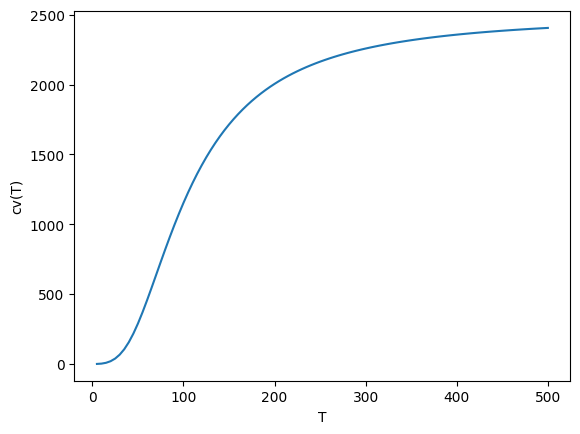

In [20]:
import matplotlib.pyplot as plt
x = np.linspace(5,500,100)
y = [cv(T) for T in x]
plt.xlabel('T')
plt.ylabel('cv(T)')
plt.plot(x,y)

## 3. Wave diffraction

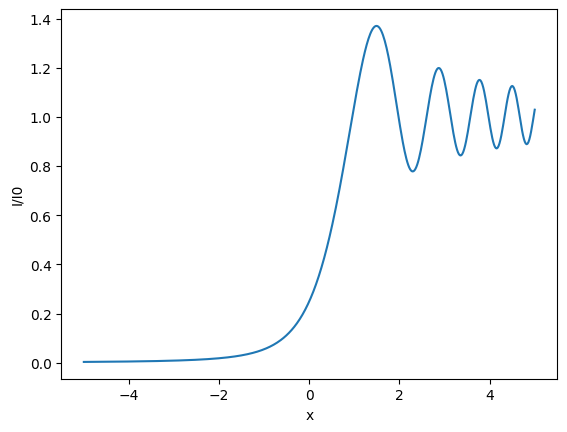

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def f(t):
    return np.cos(np.pi*t**2/2)

def g(t):
    return np.sin(np.pi*t**2/2)

def I_I0_Ratio(x):
    u = x*np.sqrt(2/3)
    N = 50
    xp, wp = gaussxwab(N, 0, u)
    Cu = np.sum(wp*f(xp))
    Su = np.sum(wp*g(xp))
    return ((2*Cu+1)**2+(2*Su+1)**2)/8

x = np.linspace(-5,5,500)
y = [I_I0_Ratio(i) for i in x]
plt.xlabel('x')
plt.ylabel('I/I0')
plt.plot(x,y)

## 4. The Lotka-Volterra equations

### (a)

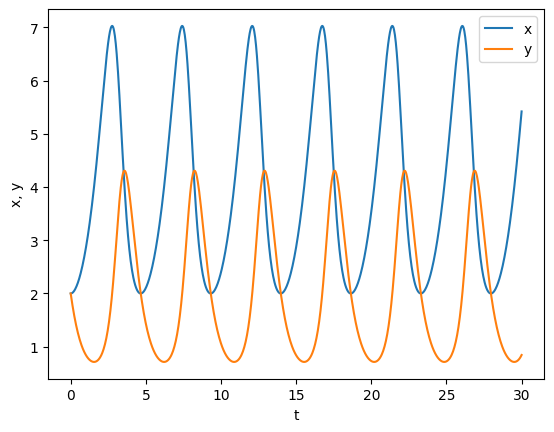

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def f(r, t):
    alpha = 1
    beta = 0.5
    gamma = 0.5
    delta = 2
    fx = alpha*r[0] - beta*r[0]*r[1]
    fy = gamma*r[0]*r[1]-delta*r[1]
    return np.array([fx, fy], dtype=float)

a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

tpoints = np.linspace(a, b, N+1)
r = np.zeros((N+1,2))
r[0] = [2.0, 2.0]

for i,t in enumerate(tpoints[:-1],1):
    k1 = h * f(r[i-1], t)
    k2 = h * f(r[i-1]+0.5*k1, t+0.5*h)
    k3 = h * f(r[i-1]+0.5*k2, t+0.5*h)
    k4 = h * f(r[i-1]+k3, t+h)
    r[i] = r[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6.0

plt.plot(tpoints, r[:,0], label='x')
plt.plot(tpoints, r[:,1], label='y')
plt.xlabel("t")
plt.ylabel("x, y")
plt.legend()
plt.show()

### (b)

## 5. Application question

### (a)

### (b)